In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

In [3]:
Fe_minteq_path = "./Fe_minteqdata.CSV"
Fe_minteq=pd.read_csv(Fe_minteq_path, sep=';', decimal=',', index_col = 0)

test_path = "./test.CSV"
test=pd.read_csv(test_path, sep=';', decimal=',')
test_wide = test.pivot('pH', 'Species', 'Concentration')
test_wide.head()

test2_path = "./test2.CSV"
test2=pd.read_csv(test2_path, sep=';', decimal=',')
test2_array = test2.values.T

test3_path = "./test3.CSV"
test3=pd.read_csv(test3_path, sep=';', decimal=',', index_col = 0)

C:\Users\nan25\AppData\Local\Temp\ipykernel_27956\1171533853.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  test_wide = test.pivot('pH', 'Species', 'Concentration')


In [4]:
def make_subplot(axes, dataname, xdataname,  ydataname, displaylabel, scilimit, color = "grey"):
    ax = axes
    sns.barplot(data = dataname, x = xdataname, y = ydataname, color = color, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, loc = 4, bbox_to_anchor = (1.07,0.93), handlelength = 0, handletextpad = 0, fontsize = 9)

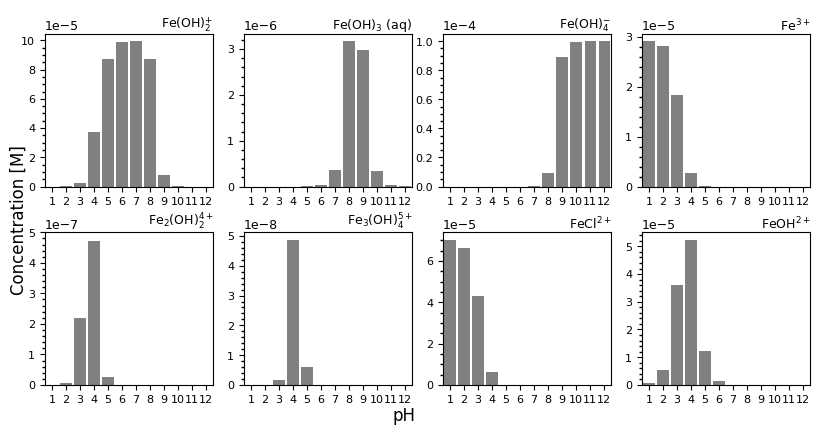

In [202]:

fig, axes = plt.subplots(2,4,figsize=(8.2,4.2))

make_subplot(axes[0][0], test2, 'pH', 'Fe(OH)2+', r'Fe(OH)$_{2}^{+}$', (-5,-5))
make_subplot(axes[0][1], test2, 'pH', 'Fe(OH)3 (aq)', r'Fe(OH)$_{3}$ (aq)', (-6,-6))
make_subplot(axes[0][2], test2, 'pH', 'Fe(OH)4-', r'Fe(OH)$_{4}^{-}$', (-4,-4))
make_subplot(axes[0][3], test2, 'pH', 'Fe+3', r'Fe$^{3+}$', (-5,-5))
make_subplot(axes[1][0], test2, 'pH', 'Fe2(OH)2+4', r'Fe$_{2}$(OH)$_{2}^{4+}$', (-7,-7))
axes[1][0].set_ylim(0,5*10**(-7))
make_subplot(axes[1][1], test2, 'pH', 'Fe3(OH)4+5', r'Fe$_{3}$(OH)$_{4}^{5+}$', (-8,-8))
make_subplot(axes[1][2], test2, 'pH', 'FeCl+2', r'FeCl$^{2+}$', (-5,-5))
make_subplot(axes[1][3], test2, 'pH', 'FeOH+2', r'FeOH$^{2+}$', (-5,-5))

#snyd
axes[0][0].set_ylabel(" ", fontsize = 3)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('pH')
fig.tight_layout(pad = 0)
plt.savefig('Fe_minteq.png', dpi=150)
plt.show()

In [2]:
Mn_path = "./Mn_minteqdata.CSV"
Mn_minteq=pd.read_csv(Mn_path, sep=';', decimal=',')

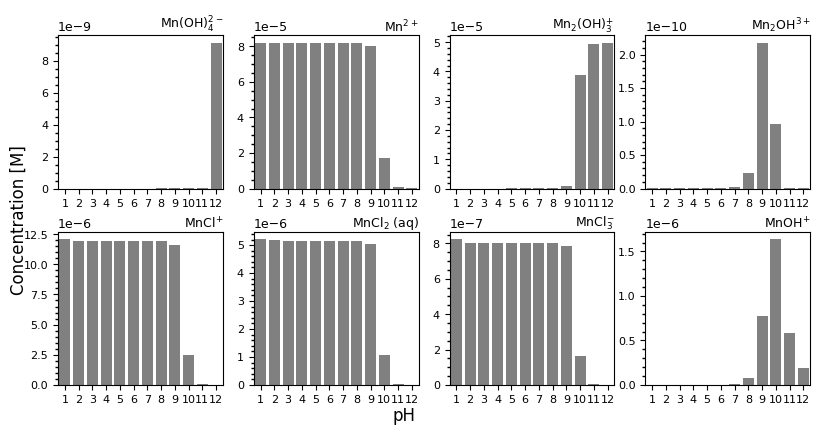

In [46]:
fig, axes = plt.subplots(2,4,figsize=(8.2,4.2))

make_subplot(axes[0][0], Mn_minteq, 'pH', 'Mn(OH)4-2', r'Mn(OH)$_{4}^{2-}$', (-9,-9))
make_subplot(axes[0][1], Mn_minteq, 'pH', 'Mn+2', r'Mn$^{2+}$', (-5,-5))
make_subplot(axes[0][2], Mn_minteq, 'pH', 'Mn2(OH)3+', r'Mn$_{2}$(OH)$_{3}^{+}$', (-5,-5))
make_subplot(axes[0][3], Mn_minteq, 'pH', 'Mn2OH+3', r'Mn$_{2}$OH$^{3+}$', (-10,-10))
make_subplot(axes[1][0], Mn_minteq, 'pH', 'MnCl+', r'MnCl$^{+}$', (-6,-6))
make_subplot(axes[1][1], Mn_minteq, 'pH', 'MnCl2 (aq)', r'MnCl$_{2}$ (aq)', (-6,-6))
make_subplot(axes[1][2], Mn_minteq, 'pH', 'MnCl3-', r'MnCl$_{3}^{-}$', (-7,-7))
make_subplot(axes[1][3], Mn_minteq, 'pH', 'MnOH+', r'MnOH$^{+}$', (-6,-6))

#snyd
axes[0][0].set_ylabel(" ", fontsize = 17)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('pH')
fig.tight_layout(pad = 0)
plt.savefig('Mn_minteq.png', dpi=150)
plt.show()

In [3]:
Mndist_path = "./Species_dist_Mn.CSV"
Mn_dist=pd.read_csv(Mndist_path, sep=';', decimal=',')

MnpH_path = "./pHvsConc_Mn.CSV"
Mn_pH=pd.read_csv(MnpH_path, sep=';', decimal=',')

Mndist_short_path = "./Species_dist_Mnshort.CSV"
Mn_dist_short=pd.read_csv(Mndist_short_path, sep=';', decimal=',')

Mndist_Rel_path = "./Species_dist_MnRel.CSV"
Mn_dist_Rel=pd.read_csv(Mndist_Rel_path, sep=';', decimal=',')

Mndist_hclRel_path = "./Species_dist_hclRel.CSV"
Mn_dist_hclRel=pd.read_csv(Mndist_hclRel_path, sep=';', decimal=',')

Mndist_h2oRel_path = "./Species_dist_h2oRel.CSV"
Mn_dist_h2oRel=pd.read_csv(Mndist_h2oRel_path, sep=';', decimal=',')

Mndist_trace_path = "./Species_dist_Mntrace.CSV"
Mn_dist_trace=pd.read_csv(Mndist_trace_path, sep=';', decimal=',')

In [4]:
def make_subplot_species(axes, dataname, xdataname,  ydataname, displaylabel, labels, color = "grey"):
    ax = axes
    sns.barplot(data = dataname, x = xdataname, y = ydataname, color = color, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xticklabels(labels, rotation = 90)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, loc = 4, bbox_to_anchor = (1.07,0.93), handlelength = 0, handletextpad = 0, fontsize = 9)

In [5]:
def make_subplot_rel(axes, dataname, xdataname,  ydataname, displaylabel, scilimit):
    ax = axes
    sns.lineplot(data = dataname, x = xdataname, y = ydataname, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, fontsize = 8)

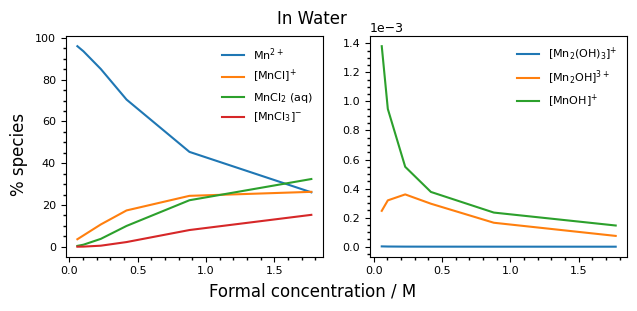

In [8]:
fig, axes = plt.subplots(1,2, figsize=(6.3,3))

make_subplot_rel(axes[0], Mn_dist_h2oRel, 'conc', 'Mn+2', r'Mn$^{2+}$', None)
make_subplot_rel(axes[0], Mn_dist_h2oRel, 'conc', 'MnCl+', r'[MnCl]$^{+}$', None)
make_subplot_rel(axes[0], Mn_dist_h2oRel, 'conc', 'MnCl2 (aq)', r'MnCl$_{2}$ (aq)', None)
make_subplot_rel(axes[0], Mn_dist_h2oRel, 'conc', 'MnCl3-', r'[MnCl$_{3}$]$^{-}$', None)
make_subplot_rel(axes[1], Mn_dist_h2oRel, 'conc', 'Mn2(OH)3+', r'[Mn$_{2}$(OH)$_{3}$]$^{+}$', (-3,-3))
make_subplot_rel(axes[1], Mn_dist_h2oRel, 'conc', 'Mn2OH+3', r'[Mn$_{2}$OH]$^{3+}$', (-3,-3))
make_subplot_rel(axes[1], Mn_dist_h2oRel, 'conc', 'MnOH+', r'[MnOH]$^{+}$', (-3,-3))

axes[0].set_ylabel(" ", fontsize = 10)
axes[1].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)

fig.suptitle('In Water')
fig.supxlabel('Formal concentration / M')
fig.supylabel('% species')
fig.tight_layout(pad=0)
plt.savefig('dist_water_full.png', dpi=150)
plt.show()

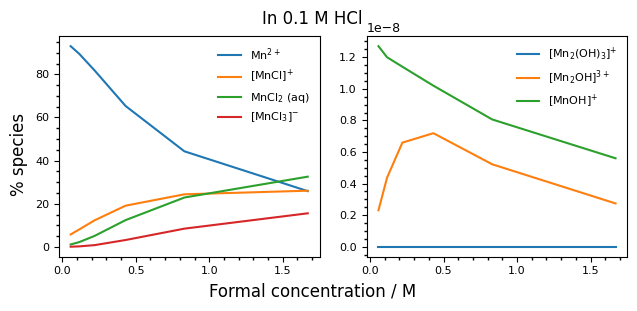

In [9]:
fig, axes = plt.subplots(1,2, figsize=(6.3,3))

make_subplot_rel(axes[0], Mn_dist_hclRel, 'conc', 'Mn+2', r'Mn$^{2+}$', None)
make_subplot_rel(axes[0], Mn_dist_hclRel, 'conc', 'MnCl+', r'[MnCl]$^{+}$', None)
make_subplot_rel(axes[0], Mn_dist_hclRel, 'conc', 'MnCl2 (aq)', r'MnCl$_{2}$ (aq)', None)
make_subplot_rel(axes[0], Mn_dist_hclRel, 'conc', 'MnCl3-', r'[MnCl$_{3}$]$^{-}$', None)
make_subplot_rel(axes[1], Mn_dist_hclRel, 'conc', 'Mn2(OH)3+', r'[Mn$_{2}$(OH)$_{3}$]$^{+}$', (-8,-8))
make_subplot_rel(axes[1], Mn_dist_hclRel, 'conc', 'Mn2OH+3', r'[Mn$_{2}$OH]$^{3+}$', (-8,-8))
make_subplot_rel(axes[1], Mn_dist_hclRel, 'conc', 'MnOH+', r'[MnOH]$^{+}$', (-8,-8))

axes[0].set_ylabel(" ", fontsize = 10)
axes[1].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)

fig.suptitle('In 0.1 M HCl')
fig.supxlabel('Formal concentration / M')
fig.supylabel('% species')
fig.tight_layout(pad=0)
plt.savefig('dist_HCl_full.png', dpi=150)
plt.show()

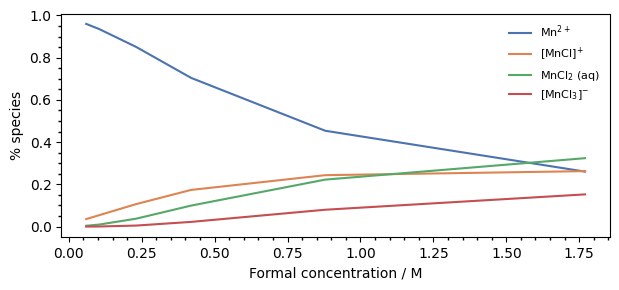

In [13]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = Mn_dist_h2oRel, x = 'conc', y = 'Mn+2', label = r'Mn$^{2+}$') 
sns.lineplot(data = Mn_dist_h2oRel, x = 'conc', y = 'MnCl+', label = r'[MnCl]$^{+}$') 
sns.lineplot(data = Mn_dist_h2oRel, x = 'conc', y = 'MnCl2 (aq)', label = r'MnCl$_{2}$ (aq)') 
sns.lineplot(data = Mn_dist_h2oRel, x = 'conc', y = 'MnCl3-', label = r'[MnCl$_{3}$]$^{-}$') 

ax.set_xlabel('Formal concentration / M')
ax.set_ylabel('% species')
# ax.set_ylim(-0.01, 0.35)
# ax.set_xlim(100, 350)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

# handles, labels = ax.get_legend_handles_labels()
plt.legend(frameon = False, fontsize = 8)
# rcParams['legend.columnspacing']=1
plt.tight_layout()
plt.savefig('water_species_dist.png', dpi=150)
plt.show()

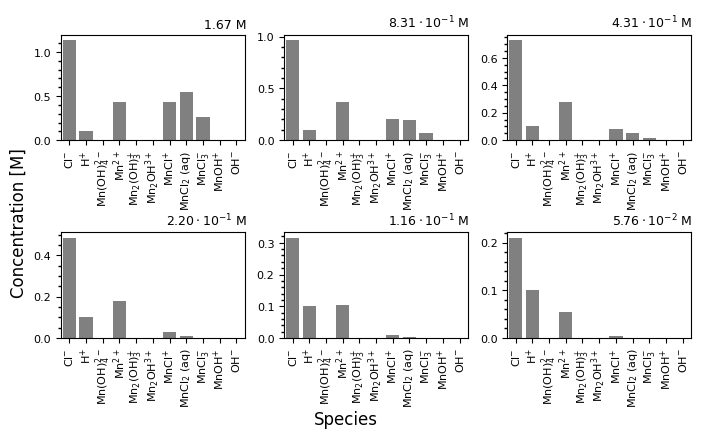

In [53]:
labels = [r'Cl$^{-}$', r'H$^{+}$', r'Mn(OH)$_{4}^{2-}$', r'Mn$^{2+}$', r'Mn$_{2}$(OH)$_{3}^{+}$', r'Mn$_{2}$OH$^{3+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnOH$^{+}$', r'OH$^{-}$']

fig, axes = plt.subplots(2,3,figsize=(7,4.2))

make_subplot_species(axes[0][0], Mn_dist, 'Species', '1,67 M', '1.67 M', labels)
make_subplot_species(axes[0][1], Mn_dist, 'Species', '0,831 M', r'$8.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[0][2], Mn_dist, 'Species', '0,431 M', r'$4.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][0], Mn_dist, 'Species', '0,22 M', r'$2.20\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][1], Mn_dist, 'Species', '0,116 M', r'$1.16\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][2], Mn_dist, 'Species', '0,0576 M', r'$5.76\cdot10^{-2}$ M', labels)

#snyd
axes[0][0].set_ylabel(" ", fontsize = 10)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('Species')
fig.tight_layout(pad = 0)
plt.savefig('MnHCl_dist.png', dpi=150)
plt.show()

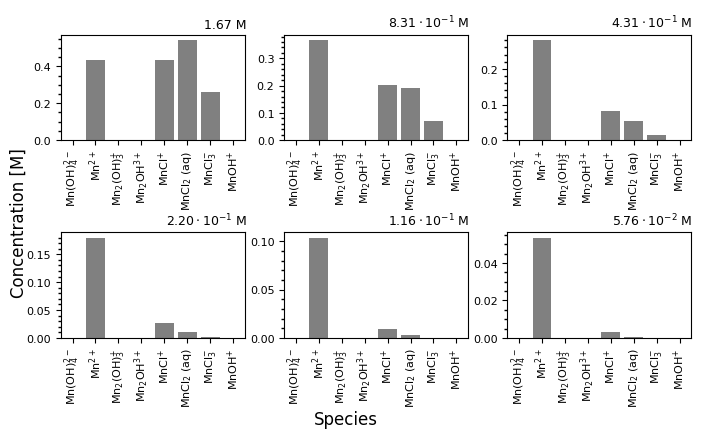

In [54]:
labels = [r'Mn(OH)$_{4}^{2-}$', r'Mn$^{2+}$', r'Mn$_{2}$(OH)$_{3}^{+}$', r'Mn$_{2}$OH$^{3+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnOH$^{+}$']

fig, axes = plt.subplots(2,3,figsize=(7,4.2))

make_subplot_species(axes[0][0], Mn_dist_short, 'Species', '1,67 M', '1.67 M', labels)
make_subplot_species(axes[0][1], Mn_dist_short, 'Species', '0,831 M', r'$8.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[0][2], Mn_dist_short, 'Species', '0,431 M', r'$4.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][0], Mn_dist_short, 'Species', '0,22 M', r'$2.20\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][1], Mn_dist_short, 'Species', '0,116 M', r'$1.16\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][2], Mn_dist_short, 'Species', '0,0576 M', r'$5.76\cdot10^{-2}$ M', labels)

#snyd
axes[0][0].set_ylabel(" ", fontsize = 10)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('Species')
fig.tight_layout(pad = 0)
plt.savefig('MnHCl_dist_short.png', dpi=150)
plt.show()

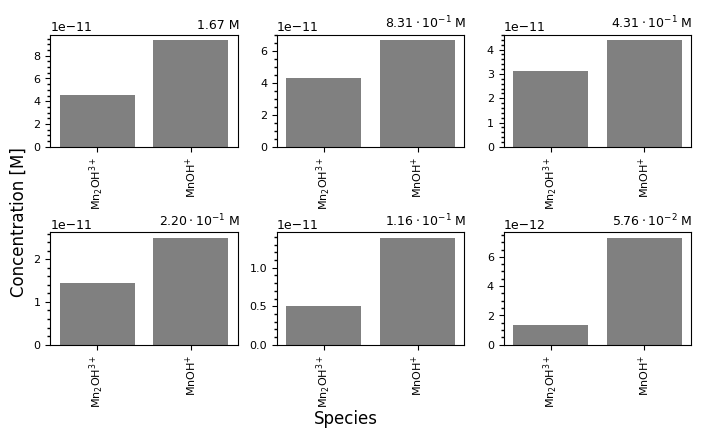

In [55]:
labels = [r'Mn$_{2}$OH$^{3+}$', r'MnOH$^{+}$']

fig, axes = plt.subplots(2,3,figsize=(7,4.2))

make_subplot_species(axes[0][0], Mn_dist_trace, 'Species', '1,67 M', '1.67 M', labels)
make_subplot_species(axes[0][1], Mn_dist_trace, 'Species', '0,831 M', r'$8.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[0][2], Mn_dist_trace, 'Species', '0,431 M', r'$4.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][0], Mn_dist_trace, 'Species', '0,22 M', r'$2.20\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][1], Mn_dist_trace, 'Species', '0,116 M', r'$1.16\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][2], Mn_dist_trace, 'Species', '0,0576 M', r'$5.76\cdot10^{-2}$ M', labels)

#snyd
axes[0][0].set_ylabel(" ", fontsize = 10)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('Species')
fig.tight_layout(pad = 0)
plt.savefig('MnHCl_dist_trace.png', dpi=150)
plt.show()

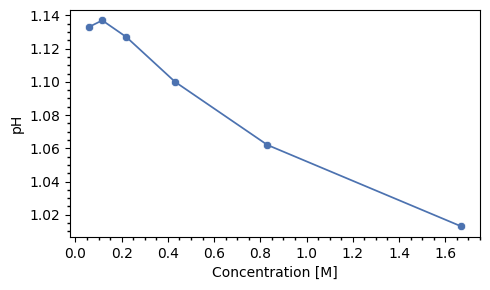

In [17]:
plt.figure(figsize=(5,3))
sns.set_palette("deep")
ax = sns.lineplot(data = Mn_pH, x = 'Concentration', y = 'pH', lw = 1.25) 
sns.scatterplot(data = Mn_pH, x = 'Concentration', y = 'pH')
ax.set_ylabel('pH')
ax.set_xlabel('Concentration [M]')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.tight_layout()
plt.savefig('pHvsConc_MnHCl.png', dpi=150)

In [11]:
Mndisth2o_path = "./Species_dist_Mnh2o.CSV"
Mnh2o_dist=pd.read_csv(Mndisth2o_path, sep=';', decimal=',')

MnpHh2o_path = "./pHvsConc_Mnh2o.CSV"
Mnh2o_pH=pd.read_csv(MnpHh2o_path, sep=';', decimal=',')

Mnh2odist_short_path = "./Species_dist_Mnh2oshort.CSV"
Mnh2o_dist_short=pd.read_csv(Mnh2odist_short_path, sep=';', decimal=',')

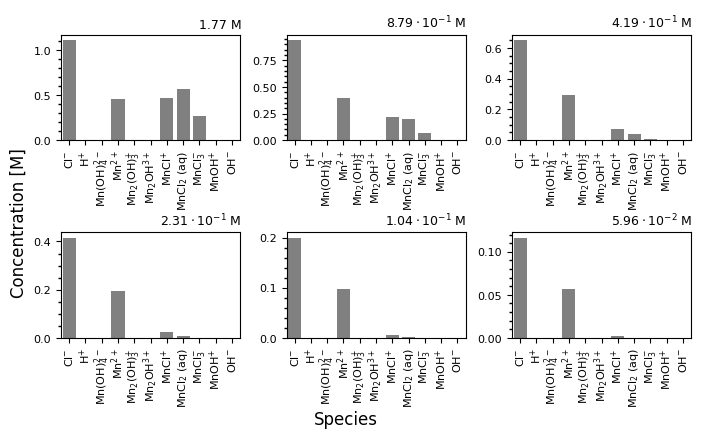

In [6]:
labels = [r'Cl$^{-}$', r'H$^{+}$', r'Mn(OH)$_{4}^{2-}$', r'Mn$^{2+}$', r'Mn$_{2}$(OH)$_{3}^{+}$', r'Mn$_{2}$OH$^{3+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnOH$^{+}$', r'OH$^{-}$']

fig, axes = plt.subplots(2,3,figsize=(7,4.2))

make_subplot_species(axes[0][0], Mnh2o_dist, 'Species', '1,77 M', '1.77 M', labels)
make_subplot_species(axes[0][1], Mnh2o_dist, 'Species', '0,879 M', r'$8.79\cdot10^{-1}$ M', labels)
make_subplot_species(axes[0][2], Mnh2o_dist, 'Species', '0,419 M', r'$4.19\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][0], Mnh2o_dist, 'Species', '0,231 M', r'$2.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][1], Mnh2o_dist, 'Species', '0,104 M', r'$1.04\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][2], Mnh2o_dist, 'Species', '0,0596 M', r'$5.96\cdot10^{-2}$ M', labels)

#snyd
axes[0][0].set_ylabel(" ", fontsize = 10)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('Species')
fig.tight_layout(pad = 0)
plt.savefig('MnH2O_dist.png', dpi=150)
plt.show()

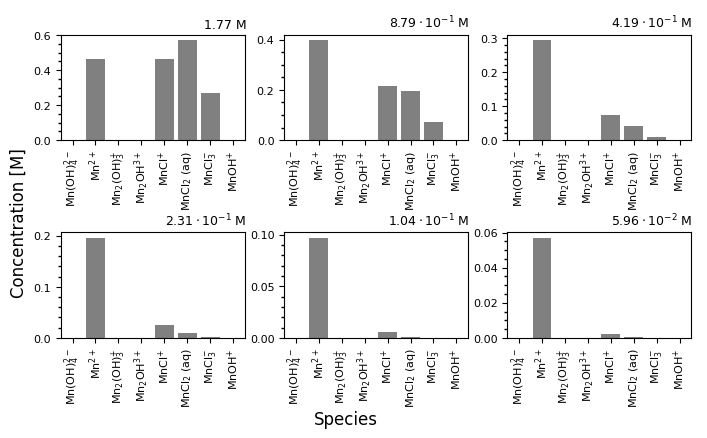

In [7]:
labels = [r'Mn(OH)$_{4}^{2-}$', r'Mn$^{2+}$', r'Mn$_{2}$(OH)$_{3}^{+}$', r'Mn$_{2}$OH$^{3+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnOH$^{+}$']

fig, axes = plt.subplots(2,3,figsize=(7,4.2))

make_subplot_species(axes[0][0], Mnh2o_dist_short, 'Species', '1,77 M', '1.77 M', labels)
make_subplot_species(axes[0][1], Mnh2o_dist_short, 'Species', '0,879 M', r'$8.79\cdot10^{-1}$ M', labels)
make_subplot_species(axes[0][2], Mnh2o_dist_short, 'Species', '0,419 M', r'$4.19\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][0], Mnh2o_dist_short, 'Species', '0,231 M', r'$2.31\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][1], Mnh2o_dist_short, 'Species', '0,104 M', r'$1.04\cdot10^{-1}$ M', labels)
make_subplot_species(axes[1][2], Mnh2o_dist_short, 'Species', '0,0596 M', r'$5.96\cdot10^{-2}$ M', labels)

#snyd
axes[0][0].set_ylabel(" ", fontsize = 10)
axes[1][0].set_xlabel(" ", fontsize = 1)

fig.supylabel('Concentration [M]')
fig.supxlabel('Species')
fig.tight_layout(pad = 0)
plt.savefig('MnH2O_dist_short.png', dpi=150)
plt.show()

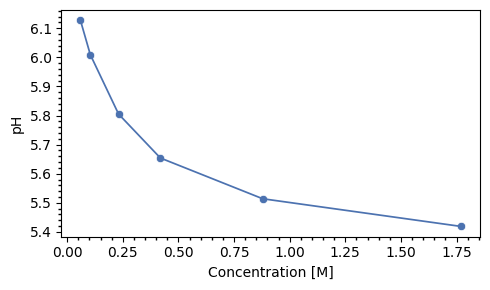

In [16]:
plt.figure(figsize=(5,3))
sns.set_palette("deep")
ax = sns.lineplot(data = Mnh2o_pH, x = 'Concentration', y = 'pH', lw = 1.25) 
sns.scatterplot(data = Mnh2o_pH, x = 'Concentration', y = 'pH')
ax.set_ylabel('pH')
ax.set_xlabel('Concentration [M]')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
plt.tight_layout()
plt.savefig('pHvsConc_MnH2O.png', dpi=150)

In [ ]:
def make_subplot_pH(axes, dataname, xdataname,  ydataname, displaylabel):
    ax = axes
    sns.lineplot(data = dataname, x = xdataname, y = ydataname, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, loc = 4, bbox_to_anchor = (1.03,0.95), handlelength = 0, handletextpad = 0, fontsize = 9)

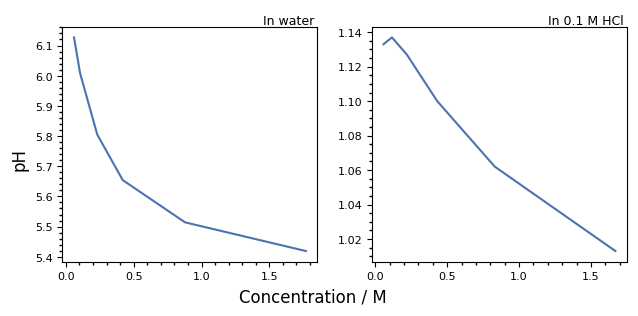

In [12]:
fig, axes = plt.subplots(1,2, figsize=(6.3,3))

make_subplot_pH(axes[0], Mnh2o_pH, 'Concentration', 'pH', 'In water')
make_subplot_pH(axes[1], Mn_pH, 'Concentration', 'pH', 'In 0.1 M HCl')

axes[0].set_ylabel(" ", fontsize = 10)
axes[1].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)

fig.supxlabel('Concentration / M')
fig.supylabel('pH')
fig.tight_layout(pad=0)
plt.savefig('Conc_pH.png', dpi=150)
plt.show()